# How to see if a csv contains the same data of a root file

In [1]:
from pandas import read_csv
import numpy

Load and inspect the csv file

In [2]:
filename = 'reale3.5.csv'
names=['category','mva','nBJets','nJets','nLeptons','jetEta_0','jetEta_1','jetEta_2','jetEta_3','jetEta_4',\
      'jetMass_0','jetMass_1','jetMass_2','jetMass_3','jetMass_4','jetMassSoftDrop_0','jetMassSoftDrop_1',\
      'jetMassSoftDrop_2','jetMassSoftDrop_3','jetMassSoftDrop_4',\
       'jetPhi_0','jetPhi_1','jetPhi_2','jetPhi_3','jetPhi_4',\
      'jetPt_0','jetPt_1','jetPt_2','jetPt_3','jetPt_4','jetTau1_0','jetTau1_1','jetTau1_2','jetTau1_3','jetTau1_4',\
      'jetTau2_0','jetTau2_1','jetTau2_2','jetTau2_3','jetTau2_4','jetTau3_0','jetTau3_1','jetTau3_2',\
      'jetTau3_3','jetTau3_4','triggerBit_0','triggerBit_1','triggerBit_2','triggerBit_3','triggerBit_4',\
      'triggerBit_5','triggerBit_6','triggerBit_7','triggerBit_8','triggerBit_9']
data = read_csv(filename, names=names)
peek=data.head(5)
print(data.shape)
print (peek)

(3500000, 55)
   category       mva  nBJets  nJets  nLeptons  jetEta_0  jetEta_1  jetEta_2  \
0       0.0  0.189198     0.0    2.0       0.0 -1.272041 -1.121414       0.0   
1       1.0  0.521495     2.0    2.0       0.0 -0.253799 -0.872368       0.0   
2       1.0  0.156925     1.0    2.0       0.0  1.732218  1.673743       0.0   
3       0.0  0.672768     0.0    2.0       0.0  0.899142  0.984780       0.0   
4       0.0  0.112140     0.0    2.0       0.0  1.691458  1.489024       0.0   

   jetEta_3  jetEta_4      ...       triggerBit_0  triggerBit_1  triggerBit_2  \
0       0.0       0.0      ...                1.0           1.0           1.0   
1       0.0       0.0      ...                1.0           1.0           1.0   
2       0.0       0.0      ...                0.0           1.0           1.0   
3       0.0       0.0      ...                1.0           1.0           1.0   
4       0.0       0.0      ...                0.0           1.0           1.0   

   triggerBit_3  t

In [3]:
types = data.dtypes
print(types)

category             float64
mva                  float64
nBJets               float64
nJets                float64
nLeptons             float64
jetEta_0             float64
jetEta_1             float64
jetEta_2             float64
jetEta_3             float64
jetEta_4             float64
jetMass_0            float64
jetMass_1            float64
jetMass_2            float64
jetMass_3            float64
jetMass_4            float64
jetMassSoftDrop_0    float64
jetMassSoftDrop_1    float64
jetMassSoftDrop_2    float64
jetMassSoftDrop_3    float64
jetMassSoftDrop_4    float64
jetPhi_0             float64
jetPhi_1             float64
jetPhi_2             float64
jetPhi_3             float64
jetPhi_4             float64
jetPt_0              float64
jetPt_1              float64
jetPt_2              float64
jetPt_3              float64
jetPt_4              float64
jetTau1_0            float64
jetTau1_1            float64
jetTau1_2            float64
jetTau1_3            float64
jetTau1_4     

Use matplotlib to inspect category and then jetPt

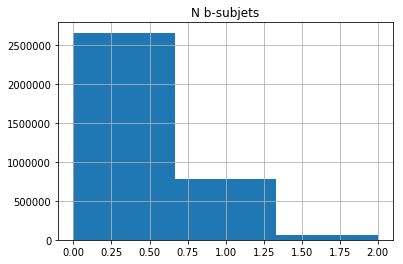

In [16]:
import matplotlib.pyplot as plt
data['category'].hist(bins=3)
plt.title("N b-subjets")

In [5]:
listone=[]
jet=['jetPt_0','jetPt_1','jetPt_2','jetPt_3','jetPt_4']
for index, row in data.iterrows():
    for i in jet:
        if row[i] != 0 :
            listone.append(row[i])

In [6]:
print len(listone)

7090178


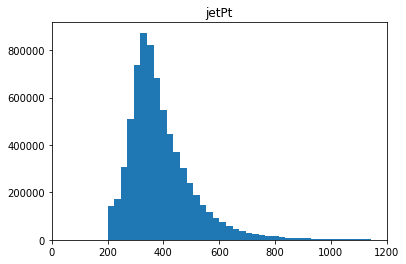

In [7]:
import matplotlib.pyplot as plt
plt.hist(listone,bins=150)
plt.title("jetPt")
axes = plt.gca()
axes.set_xlim([0,1200])
plt.show()

Use PyROOT to do plots of some variables. Then do plots of the branches with the same name, and see the same results.

In [8]:
import ROOT
from ROOT import TCanvas, TH1F

Welcome to JupyROOT 6.12/04


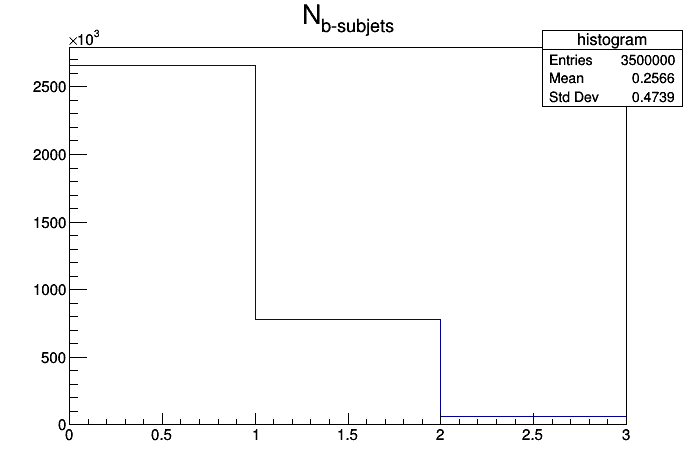

In [9]:
c = TCanvas("c1","c1")
histo=TH1F("histogram","N_{b-subjets}", 3, 0, 3)
for index, row in data.iterrows():
    histo.Fill(row['category'])
histo.Draw()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


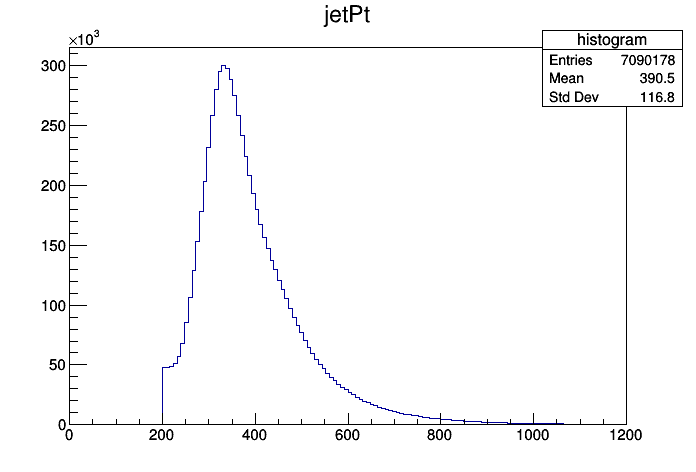

In [10]:
c = TCanvas("c1","c1")
histo=TH1F("histogram","jetPt", 150, 0, 1200)
jet=['jetPt_0','jetPt_1','jetPt_2','jetPt_3','jetPt_4']
for index, row in data.iterrows():
    for i in jet:
        if row[i] != 0 :
            histo.Fill(row[i])

histo.Draw()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


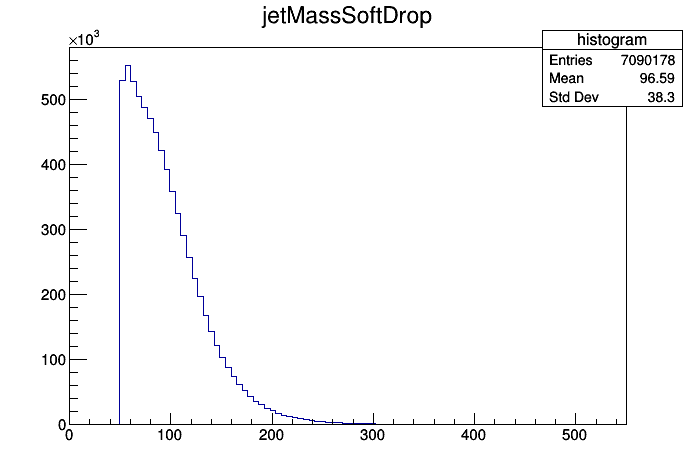

In [11]:
c = TCanvas("c1","c1")
histo=TH1F("histogram","jetMassSoftDrop", 100, 0, 550)
jet=['jetMassSoftDrop_0','jetMassSoftDrop_1','jetMassSoftDrop_2','jetMassSoftDrop_3','jetMassSoftDrop_4']
for index, row in data.iterrows():
    for i in jet:
        if row[i] != 0 :
            histo.Fill(row[i])

histo.Draw()
c.Draw()

In [12]:
f = ROOT.TFile("reale3.5M.root")
t=f.Get("events")

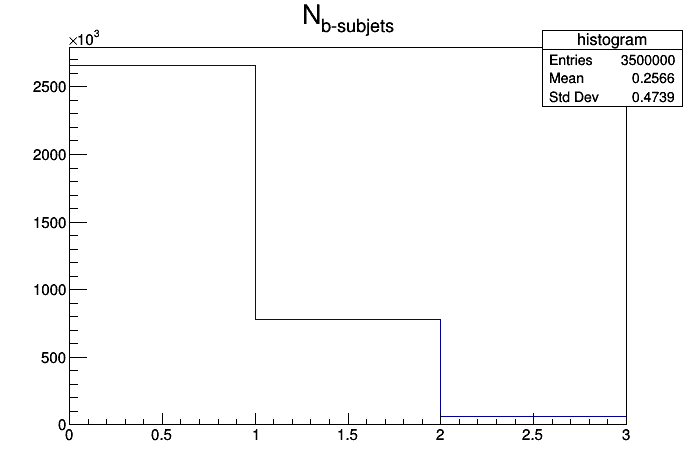

In [13]:
d = ROOT.TCanvas("myCanvasName","The Canvas Title",700,500)
prova=TH1F("histogram","N_{b-subjets}", 3, 0, 3)
for ientry in t:
    prova.Fill(t.category)
prova.Draw()
d.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName
Warning in <TFile::Append>: Replacing existing TH1: histogram (Potential memory leak).


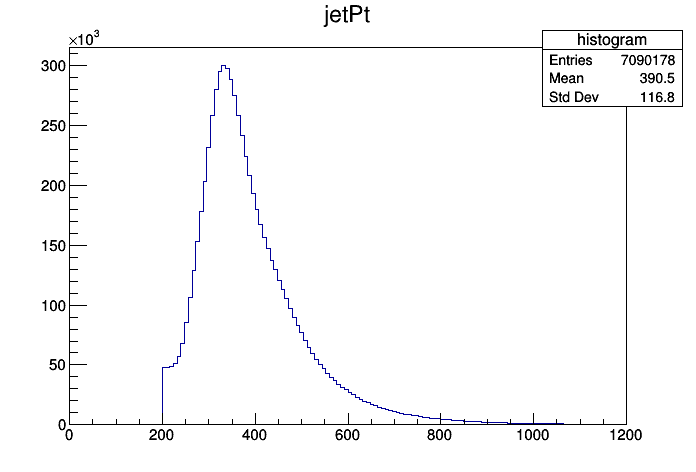

In [14]:
d = ROOT.TCanvas("myCanvasName","The Canvas Title",700,500)
prova=TH1F("histogram","jetPt", 150, 0, 1200)
for ientry in t:
    for i in range(0,len(t.jetPt)):
        prova.Fill(t.jetPt[i])
prova.Draw()
d.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName
Warning in <TFile::Append>: Replacing existing TH1: histogram (Potential memory leak).


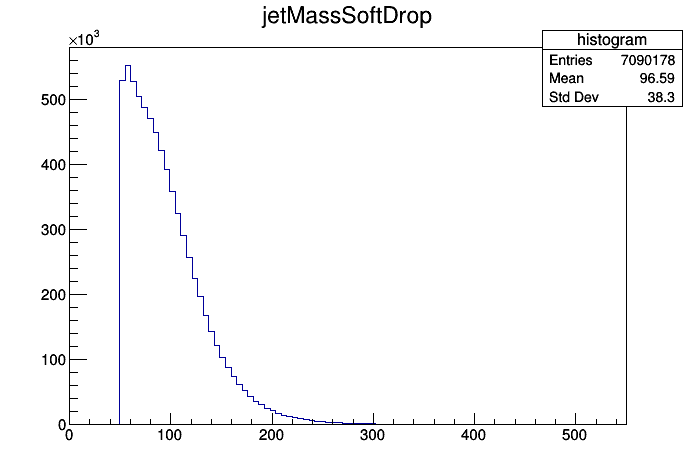

In [15]:
d = ROOT.TCanvas("myCanvasName","The Canvas Title",700,500)
prova=TH1F("histogram","jetMassSoftDrop", 100, 0, 550)
for ientry in t:
    for i in range(0,len(t.jetMassSoftDrop)):
        prova.Fill(t.jetMassSoftDrop[i])
prova.Draw()
d.Draw()